<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')


In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
df = pd.read_csv('food_truck_data.txt')
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 3: Visualize the Data
---

Text(0.5, 1.0, 'Profit in $10000s vs City Population in 10000s')

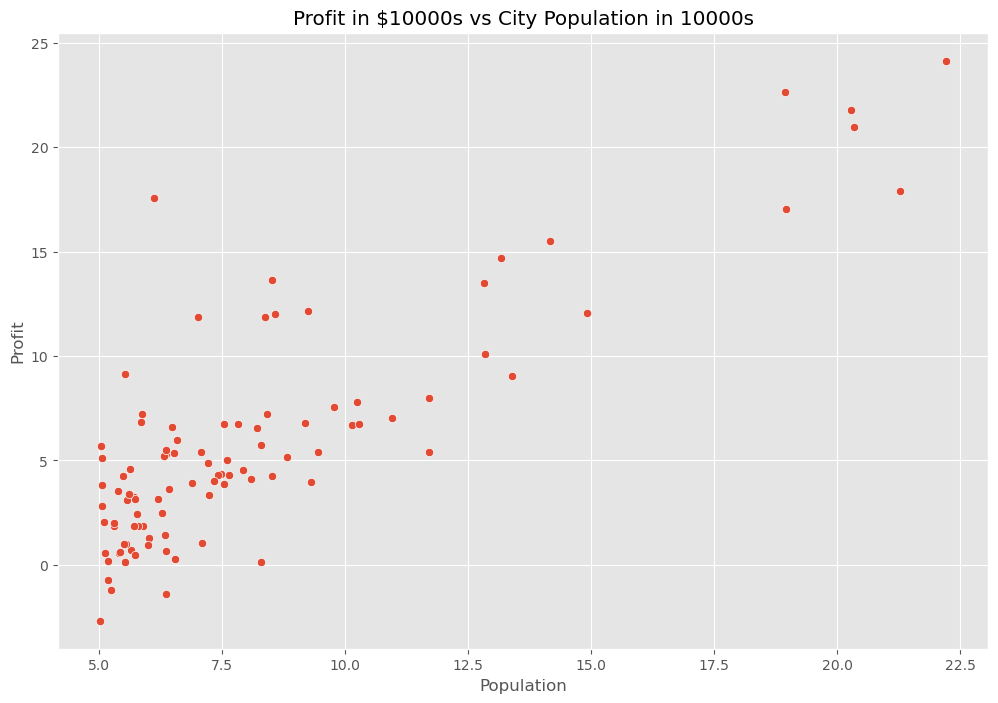

In [5]:
sns.scatterplot(x='Population', y='Profit', data=df).set_title('Profit in $10000s vs City Population in 10000s')


### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [6]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    
    return 1 / (2 * m) * np.sum(error)

In [7]:
m = df.Population.values.size
m

97

In [8]:
# X = np.append(np.ones((m, 1)), df.Population.values.reshape(m, 1), axis=1)
X = np.c_[np.ones(m), df.Population.values]
X[0:5]


array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [9]:
y = df.Profit.values.reshape(m, 1)
y[0:5]

array([[17.592 ],
       [ 9.1302],
       [13.662 ],
       [11.854 ],
       [ 6.8233]])

In [10]:
theta = np.zeros((2, 1))
theta

array([[0.],
       [0.]])

In [11]:
cost_function(X, y, theta)

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [12]:
def gradient_descent(X, y, theta, alpha, iterations): 
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
        
    return theta, costs

In [13]:
theta, costs = gradient_descent(X, y, theta, 0.01, 2000)
print(theta)
# print(costs)

[[-3.78806857]
 [ 1.18221277]]


In [14]:
print('h(x) =  {} +  {}x1'.format(str(round(theta[0, 0],2)),
                                  str(round(theta[1, 0],2))))

h(x) =  -3.79 +  1.18x1


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)
# theta_0

In [17]:

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

# t
# cost_values

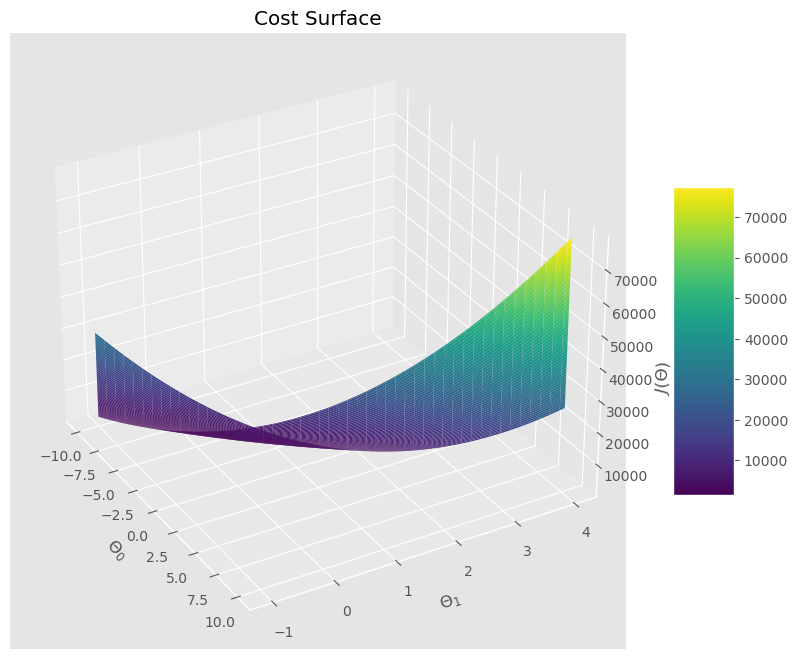

In [18]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.set_title("Cost Surface")
ax.view_init(30, 330)

plt.show()



### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

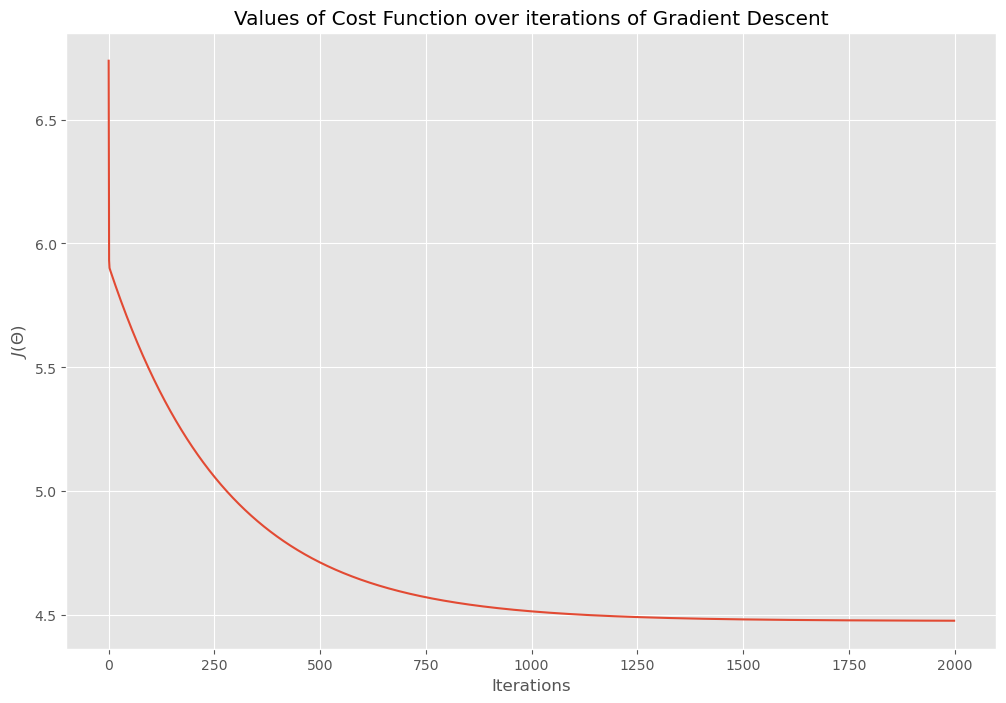

In [19]:
plt.plot(costs)

plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

### Task 8: Training Data with Linear Regression Fit
---

In [20]:
theta.shape

(2, 1)

In [21]:
theta



array([[-3.78806857],
       [ 1.18221277]])

In [22]:
theta = np.squeeze(theta)
theta

array([-3.78806857,  1.18221277])

In [23]:
x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]

# x_value
# y_value

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


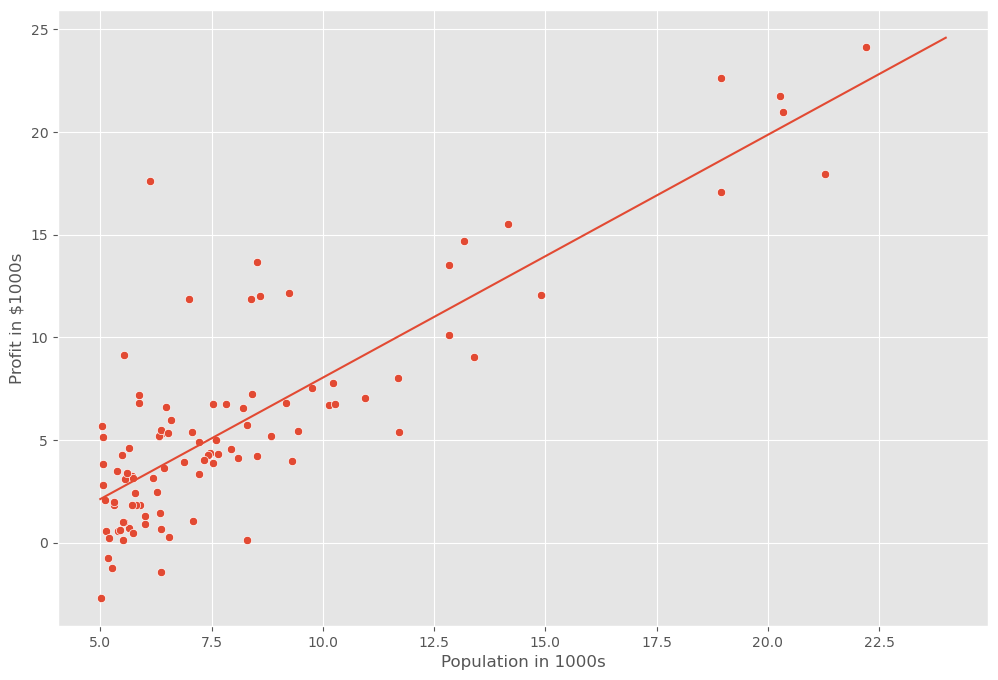

In [24]:
sns.scatterplot(x='Population', y='Profit', data=df)

sns.lineplot(x= x_value, y= y_value)

plt.xlabel('Population in 1000s')
plt.ylabel('Profit in $1000s')

plt.show()


### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [25]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [26]:
y_pred_1 = predict(np.array([1,4]), theta) * 10000
# y_pred_1
print("For a population of 40,000, the model predicts a profit of $" + str(round(y_pred_1, 0)))


For a population of 40,000, the model predicts a profit of $9408.0


In [27]:
y_pred_2 = predict(np.array([1,8.3]), theta) * 10000
# y_pred_2
print("For a population of 83,000, the model predicts a profit of $" + str(round(y_pred_2, 0)))

For a population of 83,000, the model predicts a profit of $60243.0


# Extra

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [30]:
lm = LinearRegression()
lm

LinearRegression()

In [31]:
X = df[['Population']]
Y = df['Profit']

In [32]:
X.shape, Y.shape

((97, 1), (97,))

In [33]:
lm.fit(X,Y)

LinearRegression()

In [34]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([3.39377399, 2.6989512 , 6.26719552, 4.45927234, 3.09515767])

In [35]:
Yhat.shape

(97,)

In [36]:
# The intercept and slope
intercept = lm.intercept_
slope = lm.coef_[0]

print(intercept)
print(slope)


-3.895780878311852
1.1930336441895937


In [37]:
# y_pred_1

# intercept + slope * 4 , y_pred_1/10000
lm.predict(np.array([4]).reshape(-1, 1)) * 10000, y_pred_1


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([8763.53698447]), 9407.825263063976)

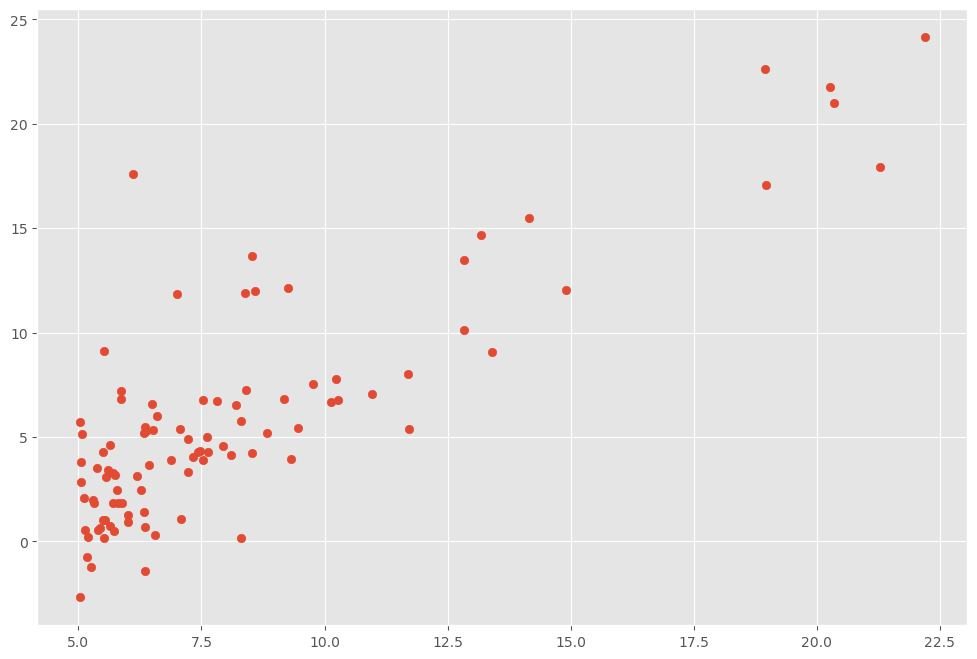

In [38]:
plt.scatter(X,Y)

<Axes: xlabel='Population', ylabel='Profit'>

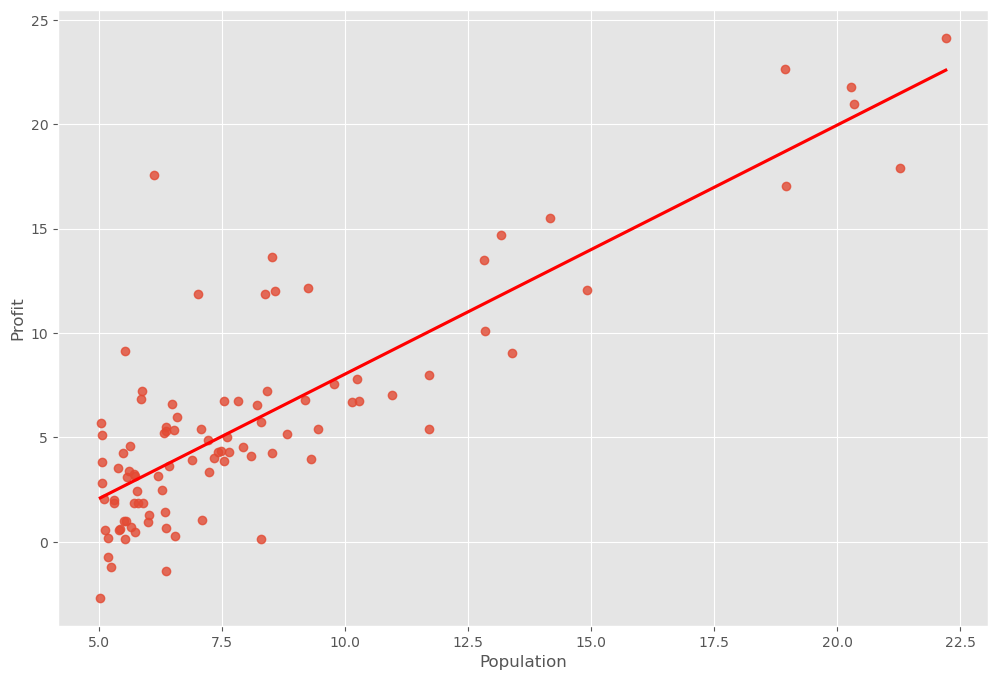

In [39]:
sns.regplot(x=X, y=Y, ci=None, line_kws={"color": "red"})


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


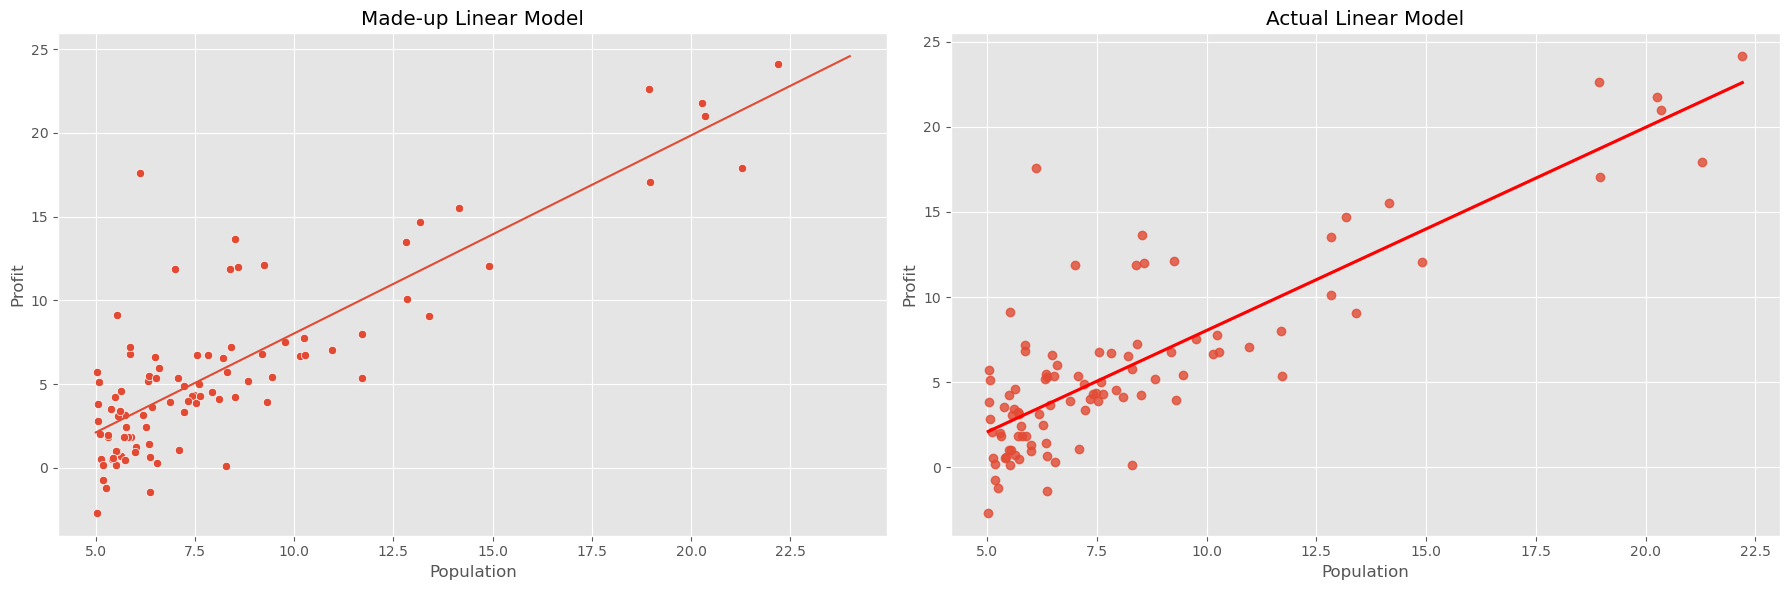

In [40]:

plt.figure(figsize=(18, 6))  # Set the figure size

# Scatter plot
plt.subplot(1, 2, 1) 
sns.scatterplot(x='Population', y='Profit', data=df)

# Line plot
plt.subplot(1, 2, 1)  
sns.lineplot(x=x_value, y=y_value)
plt.title("Made-up Linear Model") 


# VS

# Regression plot
plt.subplot(1, 2, 2) 
sns.regplot(x=X, y=Y, ci=None, line_kws={"color": "red"})
plt.title("Actual Linear Model") 

plt.tight_layout()  # Adjust the layout
plt.show()

In [41]:
theta

array([-3.78806857,  1.18221277])

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Prepare y_actual
y_actual = df['Profit'].values


In [43]:
# Step 2: Calculate y_pred_made_up using the model's equation

# y_pred_made_up = predict(X, theta)
# y_pred_1 = predict(np.array([1,4]), theta)

y_pred_made_up = np.array([])  # Step 1: Initialize as empty array
for x in X.squeeze():  # Step 2: Loop through each x
    prediction = predict(np.array([1, x]), theta)  # Steps 3 and 4: Create input array and predict
    y_pred_made_up = np.append(y_pred_made_up, prediction)  # Step 5: Append prediction

print(y_pred_made_up.shape)  # This should print (97,)

# X.squeeze()

(97,)


In [44]:
# Step 3: Prepare y_pred_actual using LinearRegression
X = df[['Population']].values  # Reshape for sklearn
model = LinearRegression()
model.fit(X, y_actual)
y_pred_actual = model.predict(X)

In [45]:
# Calculate metrics for made-up model
mae_made_up = mean_absolute_error(y_actual, y_pred_made_up)
rmse_made_up = mean_squared_error(y_actual, y_pred_made_up, squared=False)
r2_made_up = r2_score(y_actual, y_pred_made_up)

In [46]:
# Calculate metrics for actual model
mae_actual = mean_absolute_error(y_actual, y_pred_actual)
rmse_actual = mean_squared_error(y_actual, y_pred_actual, squared=False)
r2_actual = r2_score(y_actual, y_pred_actual)

In [47]:
# Print metrics
print("Made-up Model Metrics:")
print(f"MAE: {mae_made_up}, RMSE: {rmse_made_up}, R²: {r2_made_up}\n")

print("Actual Model Metrics:")
print(f"MAE: {mae_actual}, RMSE: {rmse_actual}, R²: {r2_actual}")

Made-up Model Metrics:
MAE: 2.200960094995854, RMSE: 2.992666907585931, R²: 0.70196125528343

Actual Model Metrics:
MAE: 2.1942453988270065, RMSE: 2.992313946087602, R²: 0.7020315537841397
